In [5]:
#import pandas
import pandas as pd
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#data = data.iloc[1:]
#data.head()

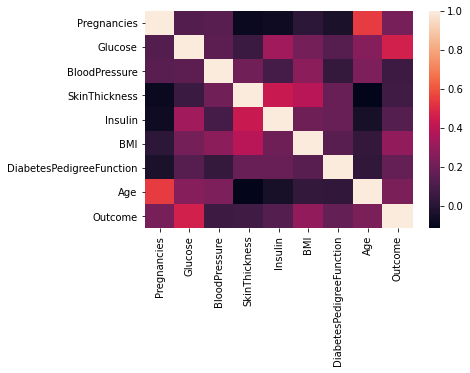

In [8]:
import seaborn as sns
c = data.corr()
sns.heatmap(c)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [13]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data_scaled = pd.DataFrame(data_scaled,columns = feature_cols)
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [14]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.Outcome # Target variable

In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
yhat = log_reg.predict_proba(X_test)
yhat = yhat[:,1]
yhat

array([0.88459579, 0.20986591, 0.1563505 , 0.59809835, 0.18197235,
       0.07669945, 0.68248386, 0.74300532, 0.45160228, 0.36999982,
       0.54747218, 0.89912235, 0.31277553, 0.25260271, 0.17094382,
       0.20114014, 0.7863355 , 0.06930982, 0.36315989, 0.31124391,
       0.55119239, 0.39579854, 0.34043069, 0.0915021 , 0.10820376,
       0.36248591, 0.09067314, 0.83068208, 0.16823411, 0.212339  ,
       0.45981092, 0.2657578 , 0.13757531, 0.46147238, 0.17515314,
       0.65413555, 0.45357888, 0.13171109, 0.36104809, 0.6755545 ,
       0.31877841, 0.24869867, 0.23348617, 0.7320846 , 0.71025711,
       0.02982386, 0.14406949, 0.26678721, 0.36912684, 0.32653218,
       0.44657317, 0.25476227, 0.81744796, 0.42571693, 0.18927726,
       0.01264127, 0.10312741, 0.45791   , 0.32138065, 0.22763661,
       0.61345037, 0.48605364, 0.17008399, 0.72728989, 0.62693749,
       0.84366781, 0.63849839, 0.19445797, 0.41795762, 0.15724279,
       0.18907799, 0.53389838, 0.13514103, 0.87540154, 0.76290

In [17]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
